# Netflix Movies and TV Shows - Exploratory Data Analysis (EDA)

This notebook will explore the Netflix dataset step by step.  
We will learn how to:
1. Load and preview the dataset
2. Clean missing or incorrect data
3. Perform descriptive analysis (counts, averages, distributions)
4. Visualize insights with charts


Task 03: Data Analytics – Exploratory Data Analysis (EDA) on Netflix Shows &
Movies EDA
• Description: In this project, you will explore the Netflix Movies and TV
Shows dataset, which contains information about thousands of titles
available on Netflix. Using Python libraries like Pandas, Matplotlib, and
Seaborn, you will clean the data, analyze trends, and visualize insights.
o Learning skills: Data wrangling, data visualization (Seaborn,
Matplotlib), basic understanding of statistics.

# Import Libraries

In [4]:
# Importing the necessary Python libraries

import pandas as pd         # For handling data tables
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns       # For advanced visualizations

# Set some default styles for prettier plots
sns.set(style="whitegrid", palette="muted")

# Load Dataset

In [7]:
# Read the Netflix dataset (making sure netflix_titles.csv is in the same folder as this notebook)

df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


show_id → Unique identifier, like a serial number for each title.
type → “Movie” or “TV Show”.
title → The name of the content.
director → The director’s name. Sometimes missing.
cast → The list of main actors/actresses. Sometimes missing.
country → Country of origin. Sometimes missing.
date_added → When Netflix added it to their library.
release_year → The original release year.
rating → Content rating, e.g., PG, PG-13, TV-MA (used to guide audiences).
duration → Movies = minutes, TV Shows = number of seasons.
listed_in → Genres/categories assigned by Netflix.
description → Short summary.

The dataset is like Netflix’s catalog. NaN means missing information. Handling NaN correctly ensures your analysis is accurate and trustworthy. Without dealing with missing data, your insights may be biased, misleading, or cause technical errors.Analyzing Netflix’s dataset helps answer:
How many movies vs TV shows exist?
Which countries contribute the most content?
What genres are most popular?
How has Netflix’s catalog grown over time?
What type of content is targeted at different age groups (ratings)?
These insights are useful for viewers, marketers, and Netflix itself to understand audience demand.

# Inspect the Data
Before analysis, we need to understand:
1. How many rows and columns the dataset has  
2. The types of data in each column  
3. If there are missing values


In [9]:
df.shape

(8807, 12)

In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset has 8,807 rows. Each row is one show or movie.
It has 12 columns (different pieces of information about each title).
Here’s what each column means:
show_id → A unique ID for each title.
type → Whether it’s a Movie or TV Show.
title → The name of the show or movie.
director → The director’s name. About 6,173 entries have this info (so ~2,600 are missing).
cast → Main actors. About 7,982 entries have this (some missing).
country → The country of origin. Present for 7,976 entries.
date_added → When the title was added to Netflix. Missing in 10 entries.
release_year → The year the movie/show was released (always filled, since it’s int64).
rating → Audience rating (like PG, TV-MA). Missing for 4 entries.
duration → Either length in minutes (for movies) or number of seasons (for TV shows). Missing for 3 entries.
listed_in → The genres/categories the title belongs to. Always filled.
description → A short summary of the show/movie. Always filled.
Memory usage: ~826 KB → very small, easy for analysis.

In [13]:
# Count missing values in each column
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

show_id, type, title, release_year, listed_in, description → No missing values. Every row has these filled.
director → Missing for 2,634 titles. That means ~30% of shows/movies don’t list a director.
cast → Missing for 825 titles. Some movies/shows don’t have cast information.
country → Missing for 831 titles. Country of origin isn’t always provided.
date_added → Missing for 10 titles. Almost complete, but a few don’t have the Netflix-added date.
rating → Missing for 4 titles. Nearly all titles have a rating.
duration → Missing for 3 titles. Almost all have a duration.

# Data cleaning

In [14]:
# Example: Fill missing country with "Unknown"
df['country'] = df['country'].fillna("Unknown")

# Drop rows where 'date_added' is missing (optional)
df = df.dropna(subset=['date_added'])

# Confirm cleaning
df.isnull().sum()


show_id            0
type               0
title              0
director        2624
cast             825
country            0
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
# Fill missing values with "Unknown" where appropriate
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

# Drop rows where critical columns are missing
df = df.dropna(subset=['date_added', 'duration'])

# Confirm missing values are handled
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The missing values are in multiple columns, not just country.
Reason I filled only country and dropped only date_added in the template was to demonstrate two strategies:
    
Imputation (filling missing values) → used for country.
Dropping rows → used for date_added.

Strategy by Column
director (2634 missing) → Many movies don’t list directors. Filling with "Unknown" or leaving it as missing is acceptable. Dropping would lose too much data.
cast (825 missing) → Same as director. Fill with "Unknown".
country (831 missing) → Fill with "Unknown" because content can still be analyzed without knowing the country.
date_added (10 missing) → Very few missing. Dropping those rows is safer because exact dates are important for time-series analysis.
rating (4 missing) → Fill with "Unknown" or "Not Rated".
duration (3 missing) → Can drop these few rows since duration is critical for analysis of length.

# Distribution of Movies vs TV Shows

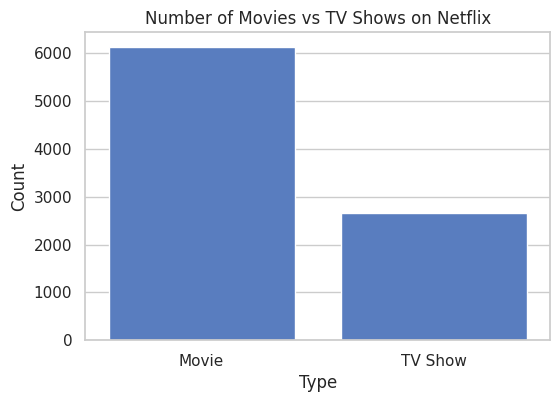

In [16]:

plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df)
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Top 10 Countries Producing Netflix Content

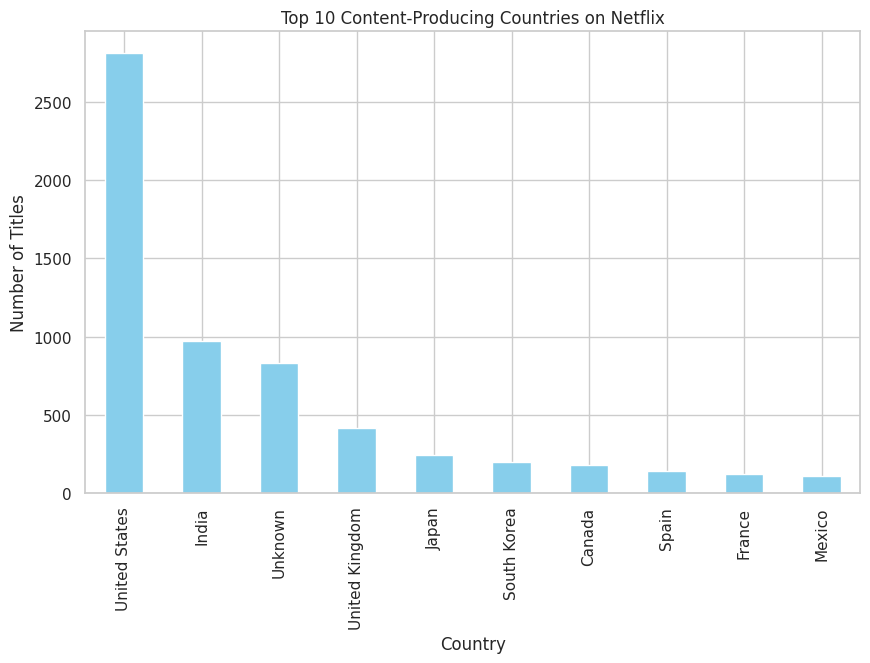

In [17]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

# Content Added Over Time

/tmp/ipykernel_8571/1178576313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_added", data=df, palette="viridis")


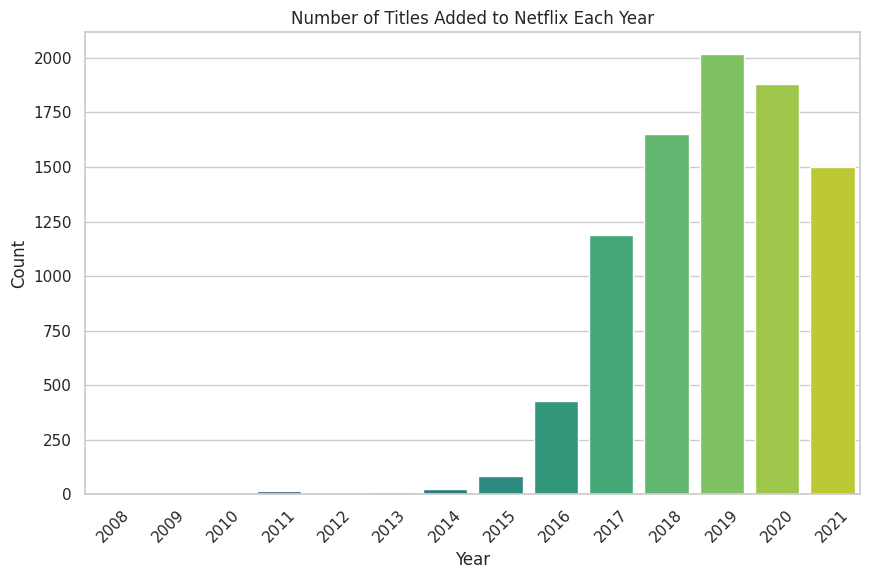

In [23]:
# Strip spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(x="year_added", data=df, palette="viridis")
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Movie Duration Analysis

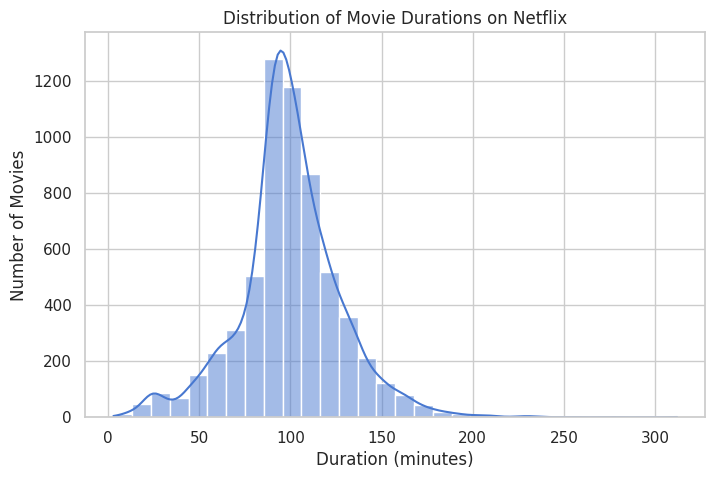

In [19]:
# Filter only Movies
movies = df[df['type'] == "Movie"]

plt.figure(figsize=(8,5))
sns.histplot(movies['duration'].str.replace(" min","").astype(float), bins=30, kde=True)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

# TV Show Seasons Analysis

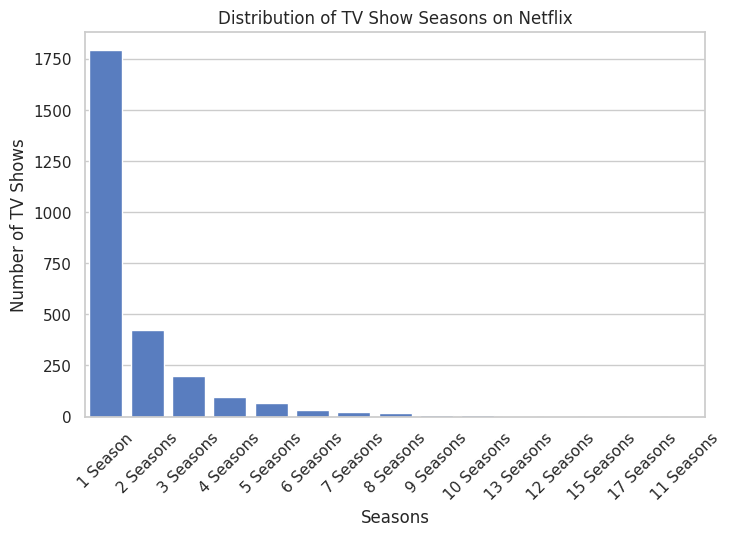

In [20]:
# Filter only TV Shows
tv_shows = df[df['type'] == "TV Show"]

plt.figure(figsize=(8,5))
sns.countplot(x="duration", data=tv_shows, order=tv_shows['duration'].value_counts().index)
plt.title("Distribution of TV Show Seasons on Netflix")
plt.xlabel("Seasons")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.show()

In [25]:
!pip install wordcloud


  Using cached wordcloud-1.9.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (539 kB)


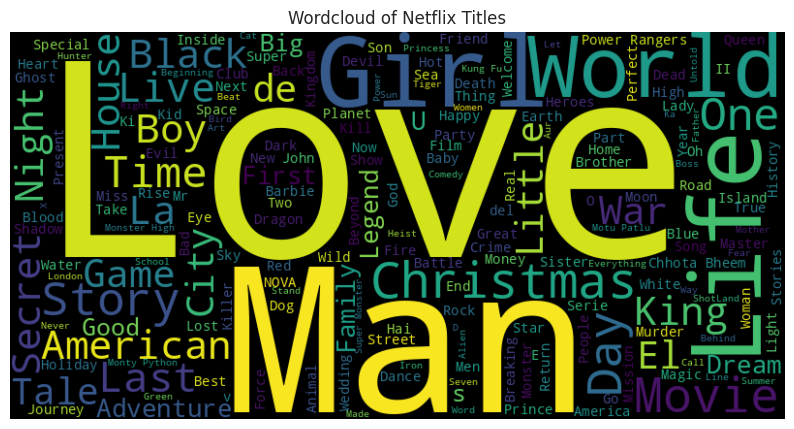

In [26]:
from wordcloud import WordCloud

# Join all titles into one string
text = " ".join(title for title in df['title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Netflix Titles")
plt.show()
